# Canvas (1)
## Pages
The origin of the drawing board is at the bottom left.

In [62]:
from IPython.display import Image, SVG, IFrame
from os import system
from drawbot_skia.drawbot import *

def drawShow(name):
    call = 'drawbot %s.py %s.png' % (name, name)
    system(call)
    return Image('%s.png' % name)

###   newPage(width=None, height=None)
Create a new canvas to draw in. This will act like a page in a pdf or a frame in a mov.

Optionally a width and height argument can be provided to set the size. If not provided the default size will be used.

Alternatively size(‘A4’) with a supported papersizes or size(‘screen’) setting the current screen size as size, can be used.

All supported papersizes: 10x14, 10x14Landscape, A0, A0Landscape, A1, A1Landscape, A2, A2Landscape, A3, A3Landscape, A4, A4Landscape, A4Small, A4SmallLandscape, A5, A5Landscape, B4, B4Landscape, B5, B5Landscape, Executive, ExecutiveLandscape, Folio, FolioLandscape, Ledger, LedgerLandscape, Legal, LegalLandscape, Letter, LetterLandscape, LetterSmall, LetterSmallLandscape, Quarto, QuartoLandscape, Statement, StatementLandscape, Tabloid, TabloidLandscape.

In [3]:
%%writefile 'newPage.py'
# loop over a range of 100
for i in range(100):
    # for each loop create a new path
    newPage(500, 500)
    # set a random fill color
    fill(random(), random(), random())
    # draw a rect with the size of the page
    rect(0, 0, width(), height())

Writing newPage.py


The call produces 100 png images ('newPage_0.png' etc), but without overwriting.  
Not sure if this is different on Linux than on OSX.

In [5]:
#drawShow('newPage')

###   newDrawing()

Reset the drawing stack to the clean and empty stack.

In [57]:
%%writefile 'newDrawing.py'
size(300,250)
# draw a rectangle
rect(10, 10, width()-20, height()-20)
# save it as a pdf
saveImage("aRect.pdf")

# reset the drawing stack to a clear and empty stack
newDrawing()
size(250,300)
# draw an oval
oval(10, 10, width()-20, height()-20)
# save it as a pdf
saveImage("anOval.pdf")

Overwriting newDrawing.py


In [64]:
system('drawbot newDrawing.py')
IFrame('aRect.pdf',width=300,height=250)

In [65]:
IFrame("anOval.pdf", width=250, height=300)

###  endDrawing()

Explicitly tell drawBot the drawing is done. This is advised when using drawBot as a standalone module.

###   size(width, height=None)

Set the width and height of the canvas. Without calling size() the default drawing board is 1000 by 1000 points.

Alternatively size(‘A4’) with a supported papersizes or size(‘screen’) setting the current screen size as size, can be used.

Afterwards the functions width() and height() can be used for calculations.

You have to use size() before any drawing-related code, and you can’t use size() in a multi-page document. Use newPage(w, h) to set the correct dimensions for each page.

In [66]:
%%writefile 'size.py'
# set a canvas size
size(200, 200)
# print out the size of the page (see terminal)
print((width(), height()))

# set a color
fill(1, 0, 0)
# use those variables to set a background color
rect(0, 0, width(), height())

Writing size.py


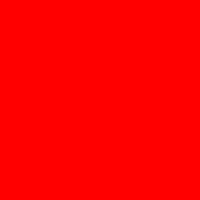

In [67]:
drawShow('size')

### sizes(paperSize=None) -> NOT IMPLEMENTED YET

Returns the width and height of a specified canvas size. If no canvas size is given it will return the dictionary containing all possible page sizes.

### pageCount() -> NOT IMPLEMENTED
Returns the current page count.

### pages() -> NOT IMPLEMENTED
Return all pages.

### frameDuration(seconds)
When exporting to mov or gif each frame can have duration set in seconds.

In [85]:
%%writefile 'frameDuration.py'

# setting some variables
# size of the pages / frames
w, h = 200, 200
# frame per seconds
fps = 30
# duration of the movie
seconds = 3
# calculate the lenght of a single frame
duration = 1 / fps
# calculate the amount of frames needed
totalFrames = seconds * fps

# title page
newPage(w, h)
# set frame duration to 1 second
frameDuration(1)
# pick a font and font size
font("Helvetica", 40)
# draw the title text in a box
#textBox("Rotated square", (0, 0, w, h * .8), align="center")

# loop over the amount of frames needed
for i in range(totalFrames):
    # create a new page
    newPage(w, h)
    # set the frame duration
    frameDuration(duration)
    # set a fill color
    fill(1, 0, 0)
    # translate to the center of the page
    translate(w / 2, h / 2)
    # rotate around the center
    rotate(i*10)
    # draw the rect
    rect(-50, -50, 50, 50)

# save the image as a mov on the desktop
saveImage('frameDuration.gif')

Overwriting frameDuration.py


### BUT EXPORT TO GIF OR MOV RETURNS ERROR: "UNSOPPORTED FILE TYPE"

In [86]:
system('drawbot frameDuration.py')

256

### linkURL, linkRect, linkDestination -> NOT IMPLEMENTED